# AT Train Data Exploration

In [1]:
# Libraries
import pandas as pd
import json
from geopy.geocoders import Nominatim
import pydeck as pdk
import seaborn as sns
import os
# !hostname


## stops.txt
Contains all stops with name, stop_id and coordinates.

to json: 
[{stop_name: 'Bohumin', stop_id: 5400038, coordinates: [stop_lon, stop_lat]}, ... ]

In [5]:
stops = pd.read_table(r"GFTS_Fahrplan_OEBB\stops.txt", sep=",")
stops = stops.drop(columns=["stop_code", "stop_desc",
                   "zone_id", "stop_url", "parent_station", "platform_code"])

In [6]:
# Adding the country name based on the coordinates
geolocator = Nominatim(user_agent="geoapiExercises")
def get_country(row):
    # print("*")
    return(geolocator.reverse(
        str(row["stop_lat"])+","+str(row["stop_lon"])).raw['address'].get('country', ''))

stops['country'] = stops.apply(get_country, axis=1)
display(stops.head(10))
# Note takes about 9 Min.

   stop_id              stop_name   stop_lat   stop_lon  location_type  \
0  5100009          Gdansk Glowny  54.355520  18.643803              0   
1  5100010          Gdynia Glowna  54.520840  18.529556              0   
2  5100066     Warszawa Wschodnia  52.251548  21.052335              0   
3  5300007  Bucuresti Nord Gara A  44.446770  26.074412              0   
4  5400014            Praha hl.n.  50.083062  14.436039              0   
5  5400018         Ceske Velenice  48.769327  14.957627              0   
6  5400038                Bohumin  49.900731  18.359444              0   
7  5400060         Horni Dvoriste  48.601815  14.421975              0   
8  5400121                 Znojmo  48.852599  16.058815              0   
9  5400202                Breclav  48.753900  16.893236              0   

   country  
0   Polska  
1   Polska  
2   Polska  
3  România  
4    Česko  
5    Česko  
6    Česko  
7    Česko  
8    Česko  
9    Česko  


In [7]:
# Subsetting the data
stops_AT = stops[stops.country == "Österreich"]
stops_INT = stops[stops.country != "Österreich"]

# To json file
stops_dict_lst_ALL = list()
stops_dict_lst_AT = list()
stops_dict_lst_INT = list()
for index, row in stops.iterrows():
    stops_dict_lst_ALL.append({"stop_name": row["stop_name"],
                           "stop_id": row["stop_id"],
                           "coordinates": [row["stop_lon"],
                                           row["stop_lat"]],
                           "country": row["country"]})
    if row["country"] == "Österreich": 
        stops_dict_lst_AT.append({"stop_name": row["stop_name"],
                           "stop_id": row["stop_id"],
                           "coordinates": [row["stop_lon"],
                                           row["stop_lat"]],
                           "country": row["country"]})
    else: 
        stops_dict_lst_INT.append({"stop_name": row["stop_name"],
                           "stop_id": row["stop_id"],
                           "coordinates": [row["stop_lon"],
                                           row["stop_lat"]],
                           "country": row["country"]})

with open("stops_ALL.json", "w") as fp:
    json.dump(stops_dict_lst_ALL, fp)

with open("stops_AT.json", "w") as fp:
    json.dump(stops_dict_lst_AT, fp)

with open("stops_INT.json", "w") as fp:
    json.dump(stops_dict_lst_INT, fp)

## routes.txt
Defines a group of trips with the same trip_type and same path. 

In [8]:
routes = pd.read_table(r"GFTS_Fahrplan_OEBB\routes.txt", sep = ",")
routes = routes.drop(columns=["route_long_name", "route_desc", "route_url", "route_color", "route_text_color"])
routes.head(10)

,route_id,agency_id,route_short_name,route_type
0,1,81,IC,102
1,10,81,REX 3,106
2,11,81,REX 2,106
3,12,81,S 3,109
4,13,81,REX,106
5,14,81,REX 6,106
6,15,81,REX 81,106
7,16,81,S,109
8,17,81,S 9,109
9,18,81,REX 9,106


## trips.txt
Contains every trip (final stop, trip_id and trip_type).

In [9]:
trips = pd.read_table(r"GFTS_Fahrplan_OEBB\trips.txt", sep = ",")
trips = trips.drop(columns=["direction_id", "shape_id"])
trips.head(10)

,route_id,service_id,trip_id,trip_headsign,trip_short_name,block_id,trip_type
0,1,1,1,Bischofshofen Bahnhof,IC 1010,1,1
1,1,2,2,Bischofshofen Bahnhof,IC 1010,1,1
2,1,3,3,Wien Hbf,IC 1011,2,1
3,1,4,4,Bischofshofen Bahnhof,IC 1012,3,1
4,1,5,5,Stainach-Irdning Bahnhof,IC 1018,4,1
5,1,6,6,Wien Hbf,IC 1019,5,1
6,1,7,7,Wien Hbf,IC 1019,6,1
7,2,0,8,Wien Hbf,RJ 1020,7,1
8,2,0,9,Flughafen Wien Bahnhof,RJ 1021,8,1
9,2,0,10,Flughafen Wien Bahnhof,RJ 1023,9,1


## stop_times.txt
Defines arrival and departure times for each stop of a trip.

In [2]:
stop_times = pd.read_table(r"GFTS_Fahrplan_OEBB\stop_times.txt", sep = ",")
stop_times = stop_times.drop(columns=["stop_headsign", "shape_dist_traveled"])

stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
0,1,09:42:00,09:42:00,8103000,1,0,1
1,1,09:47:00,09:49:00,8100514,2,0,0
2,1,10:13:00,10:15:00,8100008,3,0,0
3,1,11:00:00,11:02:00,8100013,4,0,0
4,2,11:00:00,11:02:00,8100013,4,0,0


In [3]:
# Merging stop_times and stops datasets
with open(r"stops_ALL.json", 'r') as ft:
        stop_dict = json.load(ft)

stops = pd.DataFrame(stop_dict)

stop_times_coord = pd.merge(stop_times, stops, on='stop_id', how='left')
display(stop_times_coord.head(10))
# stop_times_coord["coordinates"] = stop_times_coord.apply(
#     lambda row: [row.stop_lon, row.stop_lat], axis=1)
    
# display(stop_times_coord.head(20))

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,stop_name,coordinates,country
0,1,09:42:00,09:42:00,8103000,1,0,1,Wien Hbf,"[16.377113, 48.185101]",Österreich
1,1,09:47:00,09:49:00,8100514,2,0,0,Wien Meidling Bahnhof,"[16.333737, 48.174582]",Österreich
2,1,10:13:00,10:15:00,8100008,3,0,0,St.Pölten Hbf,"[15.623804000000002, 48.208332]",Österreich
3,1,11:00:00,11:02:00,8100013,4,0,0,Linz/Donau Hbf,"[14.291813000000001, 48.290147999999995]",Österreich
4,2,11:00:00,11:02:00,8100013,4,0,0,Linz/Donau Hbf,"[14.291813000000001, 48.290147999999995]",Österreich
5,2,11:23:00,11:26:00,8100167,5,0,0,Rohr-Bad Hall Bahnhof,"[14.191204999999998, 48.069586]",Österreich
6,2,11:47:00,11:49:00,8100170,6,0,0,Kirchdorf/Krems Bahnhof,"[14.116245999999999, 47.906187]",Österreich
7,2,12:10:00,12:16:00,8100172,7,0,0,Hinterstoder Bahnhof,"[14.178992000000001, 47.774642]",Österreich
8,2,12:27:00,12:29:00,8100517,8,0,0,Windischgarsten Bahnhof,"[14.327339000000002, 47.715373]",Österreich
9,2,12:34:00,12:36:00,8100306,9,0,0,Spital am Pyhrn Bahnhof,"[14.347548000000002, 47.673140999999994]",Österreich


In [4]:
# Creating a path from all stops of one trip_id and getting the arr/dep times of the start and end of each trip
stop_times_coord = stop_times_coord[stop_times_coord["country"]
                                    == "Österreich"]
stop_times_coord_grp = stop_times_coord.copy()

stop_times_coord_grp = stop_times_coord_grp.groupby(
    'trip_id')['coordinates'].apply(list).reset_index(name="path")

stop_times_start = stop_times_coord.groupby('trip_id').first(
).reset_index()[["trip_id", "arrival_time", "stop_id"]]
stop_times_start.rename(columns = {'arrival_time':'start_arrival_time', "stop_id":"stop_id_start"}, inplace = True)

stop_times_end = stop_times_coord.groupby('trip_id').last(
).reset_index()[["trip_id", "departure_time", "stop_id"]]
stop_times_end.rename(columns = { 'departure_time':'end_departure_time', "stop_id":"stop_id_end"}, inplace = True)

stop_times_coord_start_end = pd.merge(stop_times_coord_grp, stop_times_start, on='trip_id', how='left')
stop_times_coord_start_end = pd.merge(stop_times_coord_start_end, stop_times_end, on='trip_id', how='left')

stop_times_coord_start_end["start_hour"] = stop_times_coord_start_end["start_arrival_time"].str[:2].astype(int)
stop_times_coord_start_end["end_hour"] = stop_times_coord_start_end["end_departure_time"].str[:2].astype(int)

# times > 24 are hours after the first activity day, we will just use x-24 to get the modified time

stop_times_coord_start_end['start_hour'] = stop_times_coord_start_end['start_hour'].apply(lambda x: x if x < 24 else x - 24)
stop_times_coord_start_end['end_hour'] = stop_times_coord_start_end['end_hour'].apply(lambda x: x if x < 24 else x - 24)

display(stop_times_coord_start_end.head(10))

# Saving the dataset
stop_times_coord_start_end_json = stop_times_coord_start_end.to_json(orient="records")
parsed = json.loads(stop_times_coord_start_end_json)

with open("stop_times_grp.json", "w") as fp:
    json.dump(parsed, fp)


,trip_id,path,start_arrival_time,stop_id_start,end_departure_time,stop_id_end,start_hour,end_hour
0,1,"[[16.377113, 48.185101], [16.333737, 48.174582...",09:42:00,8103000,11:02:00,8100013,9,11
1,2,"[[14.291813000000001, 48.290147999999995], [14...",11:00:00,8100013,14:38:00,8100042,11,14
2,3,"[[13.220054000000001, 47.417871999999996], [13...",15:24:00,8100042,20:18:00,8103000,15,20
3,4,"[[16.377113, 48.185101], [16.333737, 48.174582...",13:42:00,8103000,18:38:00,8100042,13,18
4,5,"[[16.377113, 48.185101], [16.333737, 48.174582...",08:42:00,8103000,12:51:00,8100132,8,12
5,6,"[[14.107181, 47.529231], [14.011298000000002, ...",17:04:00,8100132,21:18:00,8103000,17,21
6,7,"[[14.107181, 47.529231], [14.011298000000002, ...",17:04:00,8100132,21:28:00,8103000,17,21
7,8,"[[16.563102999999998, 48.121081], [16.377113, ...",21:03:00,8100353,21:21:00,8103000,21,21
8,9,"[[16.377113, 48.185101], [16.563102999999998, ...",06:12:00,8103000,06:27:00,8100353,6,6
9,10,"[[16.377113, 48.185101], [16.563102999999998, ...",06:42:00,8103000,06:57:00,8100353,6,6


In [6]:
display(stop_times_coord.head())

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,stop_name,coordinates,country
0,1,09:42:00,09:42:00,8103000,1,0,1,Wien Hbf,"[16.377113, 48.185101]",Österreich
1,1,09:47:00,09:49:00,8100514,2,0,0,Wien Meidling Bahnhof,"[16.333737, 48.174582]",Österreich
2,1,10:13:00,10:15:00,8100008,3,0,0,St.Pölten Hbf,"[15.623804000000002, 48.208332]",Österreich
3,1,11:00:00,11:02:00,8100013,4,0,0,Linz/Donau Hbf,"[14.291813000000001, 48.290147999999995]",Österreich
4,2,11:00:00,11:02:00,8100013,4,0,0,Linz/Donau Hbf,"[14.291813000000001, 48.290147999999995]",Österreich


In [19]:
stop_times_all = list()

for ids in list(stop_times_coord.trip_id.unique()): 
    tempdf = stop_times_coord[stop_times_coord["trip_id"] == ids].copy()
    tempdf = tempdf.sort_values("stop_sequence")
    tempdict = dict()
    tempdict["trip_id"] = int(ids)
    tempdict["path"] = list()  
    for index, row in tempdf.iterrows():
        tempdict["path"].append({"stop_id": int(row["stop_id"]), "stop_name": row["stop_name"], "coordinates": row["coordinates"], "time": row["arrival_time"]})

    stop_times_all.append(tempdict)
    del tempdf



In [22]:
with open("stop_times_all.json", "w") as fp:
    json.dump(stop_times_all, fp)

# for i in range(5): 
#     print(stop_times_all[i])

# stop_times_all_json = json.dumps(stop_times_all)


,hour,count
0,0,123
1,1,200
2,2,140
3,3,178
4,4,457
5,5,971
6,6,1422
7,7,1580
8,8,1396
9,9,1285


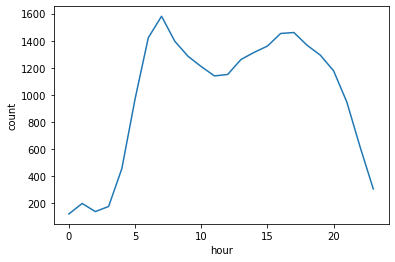

In [22]:
# Creating the data for the histogram/density chart
hour_cnt = []
for hour in range(0, 24):
    temp = len(stop_times_coord_start_end[(stop_times_coord_start_end.start_hour
                                      <= hour) & (stop_times_coord_start_end.end_hour >= hour)].index)
    hour_cnt.append([hour, temp])
    
hour_cnt_df = pd.DataFrame(hour_cnt, columns= ["hour", "count"])

display(hour_cnt_df)
sns.lineplot(data=hour_cnt_df, x="hour", y="count")

hour_cnt_df_json = hour_cnt_df.to_json(orient="records")
parsed = json.loads(hour_cnt_df_json)

with open("hour_cnt.json", "w") as fp:
    json.dump(parsed, fp)

In [ ]:
with open('stop_times_grp.json') as json_file:
    df0 = json.load(json_file)

df = pd.DataFrame(df0).head(100)

view_state = pdk.ViewState(latitude=47.59397, longitude=14.12456, zoom=6)

layer = pdk.Layer(
    type="PathLayer",
    data=df,
    pickable=False,
    width_scale=20,
    get_path="path",
    get_width=5,
    width_min_pixels=1,
    get_color='[255, 255, 255, 15]'
)

r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.to_html("path_layer.html")